In [24]:
from importlib.metadata import version

#자연어 처리
import nltk
nltk.download('stopwords')
# 딥러닝 모델 구축. 이미지 처리, 음성 인식
import tensorflow

# 텍스트 요약 작업을 할 때 필요한 라이브러리
import summa

# 데이터 조작 및 분석에 필요. 데이터 프레임을 통해 자료 제공.
import pandas as pd


import numpy as np
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')



print(nltk.__version__)
print(tensorflow.__version__)
print(pandas.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#urllib모듈 사용
import urllib.request

#데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")

#csv파일 읽기
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [26]:
# 데이터가 headlines, text로 구조를 가지고 있기 때문에 따로 데이터 프레임은 만들지 않음
data.sample(10)

,headlines,text
50533,Andhra CM misses R-Day celebrations due to del...,Andhra Pradesh Chief Minister Chandrababu Naid...
37848,4 students score 100 percentile in AIIMS MBBS ...,Four students scored 100 percentile in AIIMS M...
50063,Paytm's office boy makes Ã¢ÂÂ¹20 lakh after s...,An office boy at digital payment company Paytm...
50329,Hacked cryptocurrency exchange to repay owners...,Tokyo-based cryptocurrency exchange Coincheck ...
11051,People losing patience due to SC delay: Ramdev...,Claiming nobody is opposing the construction o...
50046,Google completes $1.1-billion deal to buy engi...,Google has completed the $1.1-billion deal wit...
2634,Taking over 'Housefull 4' wasn't tough: Direct...,While speaking about replacing filmmaker Sajid...
39212,Petrol prices decline by Ã¢ÂÂ¹1 in last 10 days,The petrol prices in Delhi has come down by Ã¢...
50969,"EU removes Panama, seven others from tax haven...",The European Union (EU) has removed eight juri...
95832,Gaikwad tries different spellings to book Air ...,"Shiv Sena MP Ravindra Gaikwad, who has been ba..."


In [27]:
# 전체 샘플 수 98401개. 중복 배제.
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [28]:
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


In [29]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [30]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


In [31]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [32]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [35]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [34]:
# 이 코드를 통해 위 함수가 잘 적용됐는지 확인 할 수 있다.
temp_headlines = 'Andhra CM misses R-Day celebrations due to'
temp_text = 'Andhra Pradesh Chief Minister Chandrababu'

print("headlines: ", preprocess_sentence(temp_headlines))
print("text:", preprocess_sentence(temp_text, False))  # 불용어를 제거하지 않습니다.

headlines:  andhra cm misses day celebrations due
text: andhra pradesh chief minister chandrababu


In [38]:
clean_headlines = []

# 중복된 행 제거
data.drop_duplicates(subset=['headlines'], inplace=True)

# 훈련 데이터의 'Text' 컬럼에 대한 전처리 반복
for sentence in data['headlines']:
    preprocessed_sentence = preprocess_sentence(sentence)
    clean_headlines.append(preprocessed_sentence)

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_headlines[:5])


Text 전처리 후 결과:  ['upgrad learner switches career ml al salary hike', 'delhi techie wins free food swiggy one year cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'known hirani yrs metoo claims true sonam']


In [39]:
clean_text = []

# 중복된 행 제거
data.drop_duplicates(subset=['text'], inplace=True)

# 훈련 데이터의 'Text' 컬럼에 대한 전처리 반복
for sentence in data['text']:
    preprocessed_sentence = preprocess_sentence(sentence)
    clean_text.append(preprocessed_sentence)

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])


Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [40]:
# clean_text, clean_summary 리스트의 길이를 맞추기
clean_headlines = clean_headlines[:len(data)]
clean_text = clean_text[:len(data)]

# 데이터프레임 열에 전처리된 데이터 할당
data['headlines'] = clean_headlines
data['text'] = clean_text

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)


In [41]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [42]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 13
헤드라인의 평균 길이 : 7.136797541267224
텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326


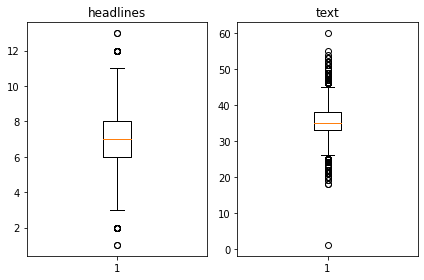

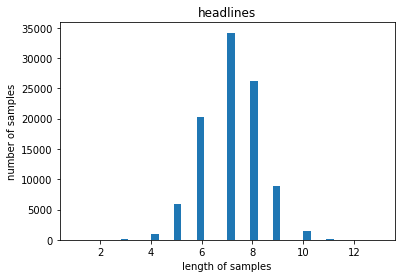

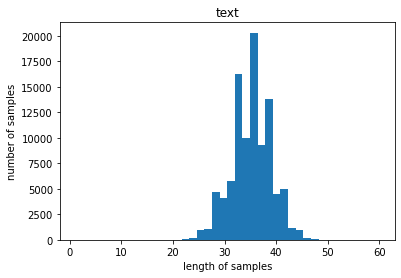

In [44]:
# 길이 분포 출력
import matplotlib.pyplot as plt

headlines_len = [len(s.split()) for s in data['headlines']]
text_len = [len(s.split()) for s in data['text']]

print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))
print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot(1,2,1)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [63]:
# 텍스트, 헤드라인 최대 길이 설정
max_text_len = 35
max_headline_len = 7

# 최대 길이를 기준으로 나눴을때 최대 길이보다 짧은 데이터의 비율을 출력해주는 함수 정의
def below_threshold_len(max_len, list):
  count = 0
  for s in list:
    if len(s.split()) <= max_len:
      count += 1
  
  print(f'길이가 {max_len}보다 짧은 데이터의 비율 : {count/len(list)}')


# 비율 확인
below_threshold_len(max_text_len, data['text'])
below_threshold_len(max_headline_len, data['headlines'])

길이가 35보다 짧은 데이터의 비율 : 0.5411145712482954
길이가 7보다 짧은 데이터의 비율 : 0.626335714721866


In [64]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_output'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target,decoder_output
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...,delhi techie wins free food swiggy one year cr...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken,known hirani yrs metoo claims true sonam eostoken


In [65]:
# 훈련 데이터 테스트 데이터로 나누기

encoder_input = np.array(data['text'])

decoder_input = np.array(data['decoder_input'])
decoder_output = np.array(data['decoder_output'])

# 데이터 섞어주기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_output = decoder_output[indices]

# 샘플 추출
encoder_input[:5]

array(['common thing among prime minister narendra modi pnb scam accused nirav modi former ipl chairman lalit modi looted country cpi general secretary sitaram yechury alleged promising waive farmers loans pm modi waived loans worth lakh crore investors industrialists yechury added',
       'major security lapse chopper carrying uttar pradesh chief minister yogi adityanath forced land field instead makeshift helipad kasganj school today incident occurred due several problems chopper landed safely chief minister proceeded programmes scheduled day',
       'baahubali set dubbed chinese japanese korean taiwanese per producer shobu yarlagadda want make baahubali accessible non english speaking audiences world said yarlagadda added makers decided start china seeing incredible number theatres across china',
       'underground tunnel archaeologists say aimed imitating underworld discovered underneath pyramid teotihuacan mexico tunnel hidden metres beneath ground archaeologist said function t

In [66]:
val_size = int(encoder_input.shape[0] * 0.2)

encoder_input_train = encoder_input[:-val_size]
decoder_input_train = decoder_input[:-val_size]
decoder_output_train = decoder_output[:-val_size]

encoder_input_test = encoder_input[-val_size:]
decoder_input_test = decoder_input[-val_size:]
decoder_output_test = decoder_output[-val_size:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78610
훈련 레이블의 개수 : 78610
테스트 데이터의 개수 : 19652
테스트 레이블의 개수 : 19652


In [67]:
# 모델 학습을 위해서 정수 인코딩 과정
# 토크나이저 설정
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

# 단어 빈도수 체크
threshold = 4
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in src_tokenizer.word_counts.items():
  total_freq = total_freq + value
  
  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value


print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69591
등장 빈도가 3번 이하인 희귀 단어의 수: 39938
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 29653
단어 집합에서 희귀 단어의 비율: 57.38960497765516
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.1836195561236895


In [68]:
src_vocab = 30847
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

# 정수 인코딩 
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 샘플 출력하여 확인
print(encoder_input_train[:3])

[[1797, 1303, 190, 150, 15, 113, 47, 1581, 1258, 44, 1337, 47, 28, 421, 329, 6379, 47, 7541, 39, 3391, 255, 440, 9289, 8539, 107, 4971, 8681, 693, 1148, 49, 47, 8023, 1148, 212, 58, 18, 622, 13380, 8539, 4], [448, 127, 10488, 7432, 739, 165, 59, 45, 15, 814, 768, 730, 600, 1086, 617, 10489, 20666, 10991, 194, 307, 148, 1448, 111, 159, 1624, 7432, 2153, 4223, 45, 15, 19450, 4888, 399, 41], [2362, 126, 2770, 281, 1019, 536, 7779, 125, 1007, 29654, 24026, 288, 120, 2362, 6708, 395, 941, 326, 7542, 19, 1, 24026, 4, 2122, 492, 632, 104, 2798, 5904, 144, 5332, 249, 104]]


In [69]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)


threshold = 4
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29983
등장 빈도가 3번 이하인 희귀 단어의 수: 16936
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13047
단어 집합에서 희귀 단어의 비율: 56.48534169362639
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.9920044260096836


In [70]:
tar_vocab = 13676
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_output_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_output_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_output_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 59, 40, 5332, 3196, 2251, 96, 6393, 519], [1, 2563, 408, 468, 107, 97, 387, 2133, 5103], [1, 121, 443, 778, 951, 6734, 8, 135], [1, 2330, 5333, 4019, 78, 996, 5334], [1, 592, 1033, 29, 6052, 1796, 5788]]
target
decoder  [[59, 40, 5332, 3196, 2251, 96, 6393, 519, 2], [2563, 408, 468, 107, 97, 387, 2133, 5103, 2], [121, 443, 778, 951, 6734, 8, 135, 2], [2330, 5333, 4019, 78, 996, 5334, 2], [592, 1033, 29, 6052, 1796, 5788, 2]]


In [71]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78609
훈련 레이블의 개수 : 78609
테스트 데이터의 개수 : 19652
테스트 레이블의 개수 : 19652


In [72]:
# 길이가 다르니 패딩 진행
encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headline_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headline_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_headline_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_headline_len, padding='post')

In [75]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 256
hidden_size = 128

# 인코더
encoder_inputs = Input(shape=(max_text_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 256)      7896832     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 128), (N 197120      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [76]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden_state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 256)      7896832     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 128), (N 197120      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [77]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
308/308 [==============================] - 47s 44ms/step - loss: 7.1723 - val_loss: 6.8898
Epoch 2/50
308/308 [==============================] - 12s 41ms/step - loss: 6.9199 - val_loss: 6.8203
Epoch 3/50
308/308 [==============================] - 13s 41ms/step - loss: 6.8061 - val_loss: 6.7131
Epoch 4/50
308/308 [==============================] - 13s 41ms/step - loss: 6.6881 - val_loss: 6.6331
Epoch 5/50
308/308 [==============================] - 13s 42ms/step - loss: 6.5544 - val_loss: 6.5135
Epoch 6/50
308/308 [==============================] - 13s 42ms/step - loss: 6.4260 - val_loss: 6.4476
Epoch 7/50
308/308 [==============================] - 13s 43ms/step - loss: 6.3059 - val_loss: 6.3822
Epoch 8/50
308/308 [==============================] - 13s 44ms/step - loss: 6.1977 - val_loss: 6.2861
Epoch 9/50
308/308 [==============================] - 14s 44ms/step - loss: 6.0999 - val_loss: 6.2527
Epoch 10/50
308/308 [==============================] - 14s 44ms/step - loss: 6.006

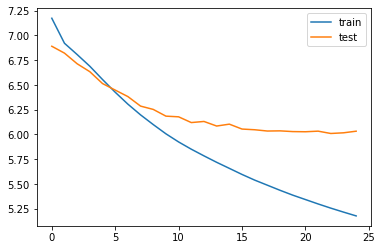

In [78]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [80]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어

# 인코더
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size, ))
decoder_state_input_c = Input(shape=(hidden_size, ))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태를 이전 시점의 상태로 사용
# 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은틱 상태와 셀 상태인 state_h와 state_c를 버리지 않음
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
decoder_outputs, state_h, state_c = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(max_text_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
     [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
     [decoder_outputs2] + [state_h, state_c])

def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  
  # <SOS>에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0,0] = tar_word_to_index['starttoken']
  
  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:
  
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = tar_index_to_word[sampled_token_index]
    
    if (sampled_token != 'endtoken'):
      decoded_sentence += ' '+sampled_token
      
    # <EOS>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_token == 'endtoken' or len(decoded_sentence.split()) >= (max_headline_len - 1)):
      stop_condition = True
    
    # 길이가 1인 타겟 시퀀스를 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index
    
    # 상태를 업데이트 합니다.
    e_h, e_c = h, c
    
  return decoded_sentence

In [89]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['starttoken']) and i!=tar_word_to_index['endtoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [90]:
for i in range(50, 60):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, max_text_len)))
    print("\n")

원문 : odisha government friday submitted application seek geographical indication tag rasagola months gi registry declared rosogolla originated west bengal two states engaged tussle origin sweet since odisha claims rasagola originated state years ago 


KeyError: 'starttoken'